**Libraries**

1. importing libraries 
2. importing Dataset

In [1]:
#importing all the libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.offline as py 
import warnings                                       # to ignore Warnings



Loan_data=pd.read_csv("/content/loan.csv")            # importing data set of Loan
applicant_data=pd.read_csv("/content/applicant.csv")  # importing data set of Applicant


In [2]:
df_new=pd.merge(Loan_data,applicant_data,on='applicant_id')     # Merging two data sets on Applicant id 
df_new.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,...,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,...,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,...,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,...,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,...,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,...,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [3]:
df_new.isnull().sum()                            # To Check number of null values present in data set

loan_application_id                                           0
applicant_id                                                  0
Months_loan_taken_for                                         0
Purpose                                                      12
Principal_loan_amount                                         0
EMI_rate_in_percentage_of_disposable_income                   0
Property                                                    154
Has_coapplicant                                               0
Has_guarantor                                                 0
Other_EMI_plans                                             814
Number_of_existing_loans_at_this_bank                         0
Loan_history                                                  0
high_risk_applicant                                           0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                          

In [4]:
df_new.info()                                 # To get dtypes of different columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   loan_application_id                                       1000 non-null   object
 1   applicant_id                                              1000 non-null   int64 
 2   Months_loan_taken_for                                     1000 non-null   int64 
 3   Purpose                                                   988 non-null    object
 4   Principal_loan_amount                                     1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income               1000 non-null   int64 
 6   Property                                                  846 non-null    object
 7   Has_coapplicant                                           1000 non-null   int64 
 8   Has_guarantor                

# **Fill the missing values by Mode function**

In [5]:
# handling missing values of categorical data

# Fill mode value of respective column in missing place


df_new['Purpose']=df_new['Purpose'].replace(np.nan,df_new['Purpose'].mode()[0])  
df_new['Property']=df_new['Property'].replace(np.nan,df_new['Property'].mode()[0])


df_new['Has_been_employed_for_at_least']=df_new['Has_been_employed_for_at_least'].replace(np.nan,df_new['Has_been_employed_for_at_least'].mode()[0])
df_new['Has_been_employed_for_at_most']=df_new['Has_been_employed_for_at_most'].replace(np.nan,df_new['Has_been_employed_for_at_most'].mode()[0])
df_new['Savings_account_balance']=df_new['Savings_account_balance'].replace(np.nan,df_new['Savings_account_balance'].mode()[0])
df_new['Balance_in_existing_bank_account_(lower_limit_of_bucket)']=df_new['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].replace(np.nan,df_new['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].mode()[0])
df_new['Balance_in_existing_bank_account_(upper_limit_of_bucket)']=df_new['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].replace(np.nan,df_new['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].mode()[0])

In [6]:
df_new.isnull().sum()      # check weather missing values are not after mode operation

loan_application_id                                           0
applicant_id                                                  0
Months_loan_taken_for                                         0
Purpose                                                       0
Principal_loan_amount                                         0
EMI_rate_in_percentage_of_disposable_income                   0
Property                                                      0
Has_coapplicant                                               0
Has_guarantor                                                 0
Other_EMI_plans                                             814
Number_of_existing_loans_at_this_bank                         0
Loan_history                                                  0
high_risk_applicant                                           0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                          

# lets drop telephone column  and other emi plans Because it have many missing values and it does not affect our target column

In [7]:
df_new=df_new.drop(['Other_EMI_plans','Telephone'],axis=1)   # drop columns that not required


In [8]:
df_new.isnull().sum()

loan_application_id                                         0
applicant_id                                                0
Months_loan_taken_for                                       0
Purpose                                                     0
Principal_loan_amount                                       0
EMI_rate_in_percentage_of_disposable_income                 0
Property                                                    0
Has_coapplicant                                             0
Has_guarantor                                               0
Number_of_existing_loans_at_this_bank                       0
Loan_history                                                0
high_risk_applicant                                         0
Primary_applicant_age_in_years                              0
Gender                                                      0
Marital_status                                              0
Number_of_dependents                                        0
Housing 

# ***analysis of columns with respect to target column***

# **insights of High risk applicant column**

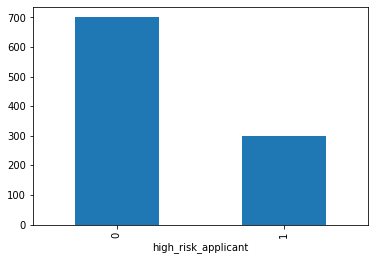

In [9]:
df_new.groupby(['high_risk_applicant']).size().plot.bar()

# *Insights from above Graph*

In Total of 1000 Records of applicants 700 applicants have High chance of paying loan amount and remaining 300 people have less chance of paying amount

# **Marital Status v/s High risk applicant**

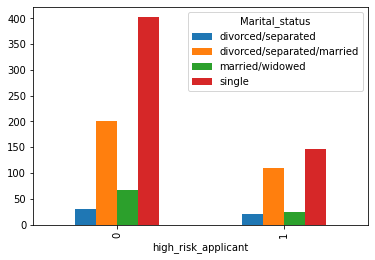

In [10]:
df_new.groupby(['high_risk_applicant','Marital_status']).size().unstack().plot.bar()

# Insights from above Graph:

1. persons who are not married have high chances of paying back loan amount and follwed by Divorced/Separated/married, Married/widowed, Divorced/Separated.
2. As same as above persons who not married have higher value in less chance of paying loan amount and so on. 

# **House ownership v/s high risk applicant**

<function matplotlib.pyplot.show(*args, **kw)>

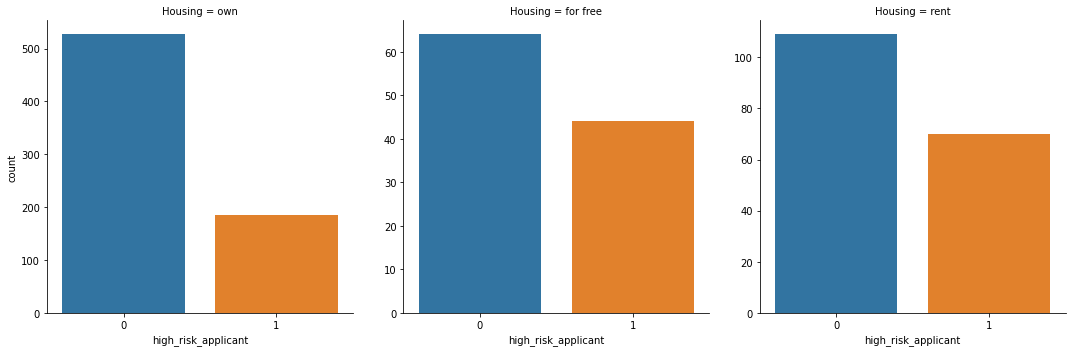

In [11]:
sns.catplot(x='high_risk_applicant',data=df_new,col='Housing',kind='count',sharey=False)
plt.show

# Insights From Graph:

In the catagory of people who have own house has high probabiity of paying back loan amount, Followed by who live in rented house and who live for free


# **Gender v/s Target Column**

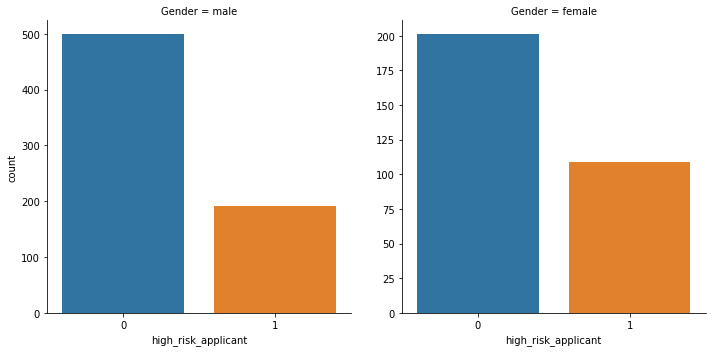

In [12]:
sns.catplot(x='high_risk_applicant',data=df_new,col='Gender',kind='count',sharey=False)
plt.show()

# **To know The Skew distibution of numerical variable**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



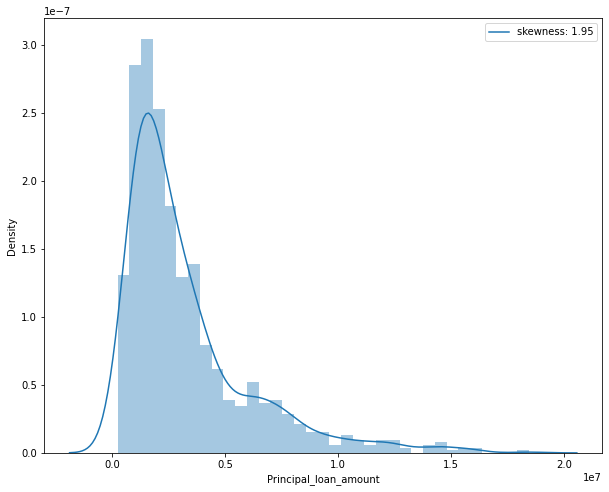

In [13]:
plt.figure(figsize=(10,8))
sns.distplot(df_new["Principal_loan_amount"])
plt.legend(["skewness: {:.2f}".format(df_new['Principal_loan_amount'].skew())])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



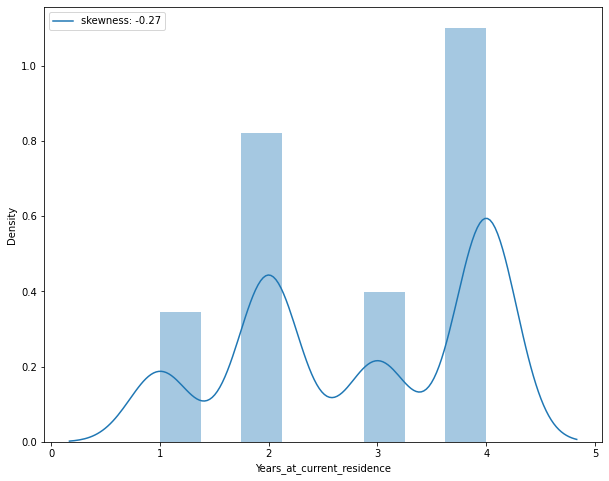

In [14]:
plt.figure(figsize=(10,8))
sns.distplot(df_new["Years_at_current_residence"])
plt.legend(["skewness: {:.2f}".format(df_new['Years_at_current_residence'].skew())])

# Insights From Graph:

males have high chance of paying back loan amount as compared to females

# **Employment Status v/s high Risk applicant**

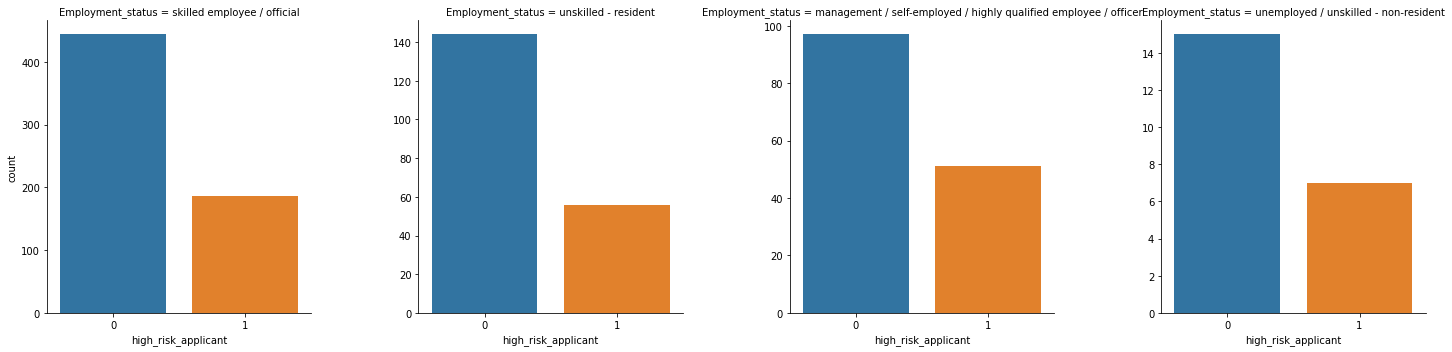

In [15]:
sns.catplot(x='high_risk_applicant',data=df_new,col='Employment_status',kind='count',sharey=False)
plt.show()

# Insights from Graph:

persons have Employed have high chance to pay back loan and unemployed/Unskilled person have less chance to pay back

# **Property v/s High Risk applicant**

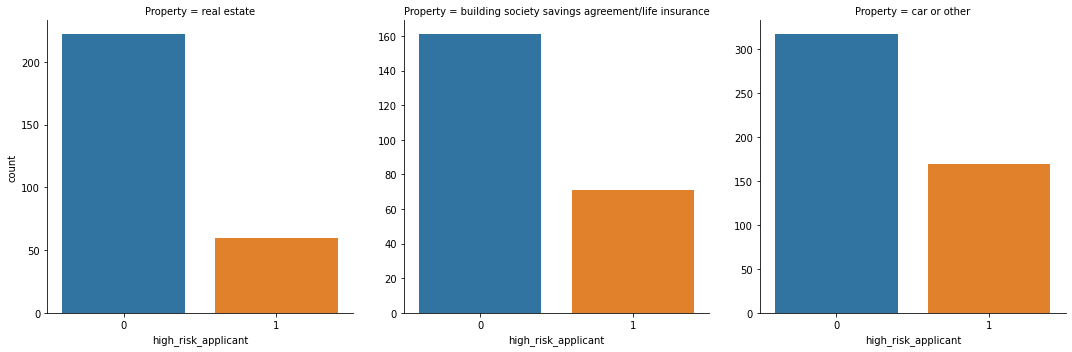

In [16]:
sns.catplot(x='high_risk_applicant',data=df_new,col='Property',kind='count',sharey=False)
plt.show()

# Insights from Graph:

persons who own car is high chance to pay back loan and also they have high chance to not to  pay loan amount, almost 50% people who have car less chance to pay

# **Savings Balance v/s High risk Apllicant**

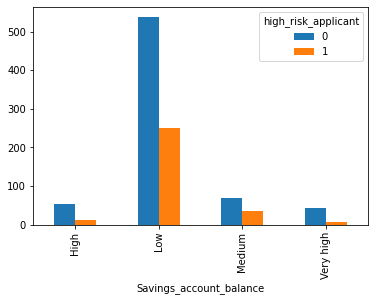

In [17]:
df_new.groupby(['Savings_account_balance','high_risk_applicant']).size().unstack().plot.bar()
plt.show()

# Insights from graph:

1. Most of the applicant have low savings in account around 80%, and less number people about 5% have very high savings 
2. peope have Low savings in bank were high chance as well as low chance  to pay back.

# **Purpose v/s High Risk applicant**

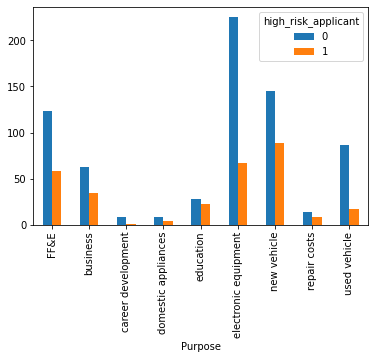

In [18]:
df_new.groupby(['Purpose','high_risk_applicant']).size().unstack().plot.bar()

# Insights from graph:

persons took loan for electronic equipment were high chance to pay back loan and who took for domestic appliances have less chance to pay back.

In [19]:
df_new.columns


Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)'],
      dtype='object')

# **EMI rate v/s Months loan taken**

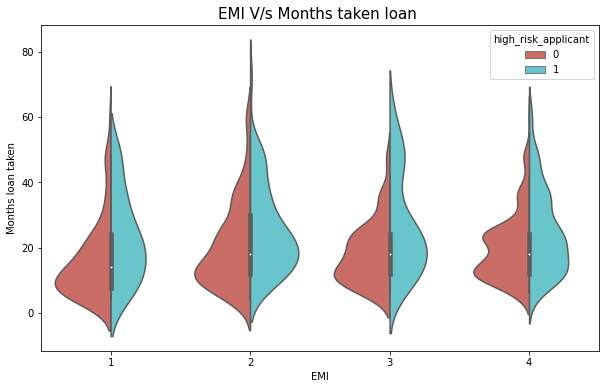

In [20]:
plt.figure(figsize=(10,6))

A=sns.violinplot(x='EMI_rate_in_percentage_of_disposable_income',y='Months_loan_taken_for',data=df_new,hue='high_risk_applicant',palette='hls',split=True)
A.set_xlabel("EMI",fontsize=10)
A.set_ylabel('Months loan taken',fontsize=10)
A.set_title('EMI V/s Months taken loan ',fontsize=15)
plt.show()


# insights From Graph:

1. persons who took loan for about 0 to 30 months have high chances to pay back in all EMI options.
2. persons have choose option 2 of EMI have less chance to pay back loan

# **Identify significant Variables using correlation Matrix all are numerical variables having greater than 0.1**

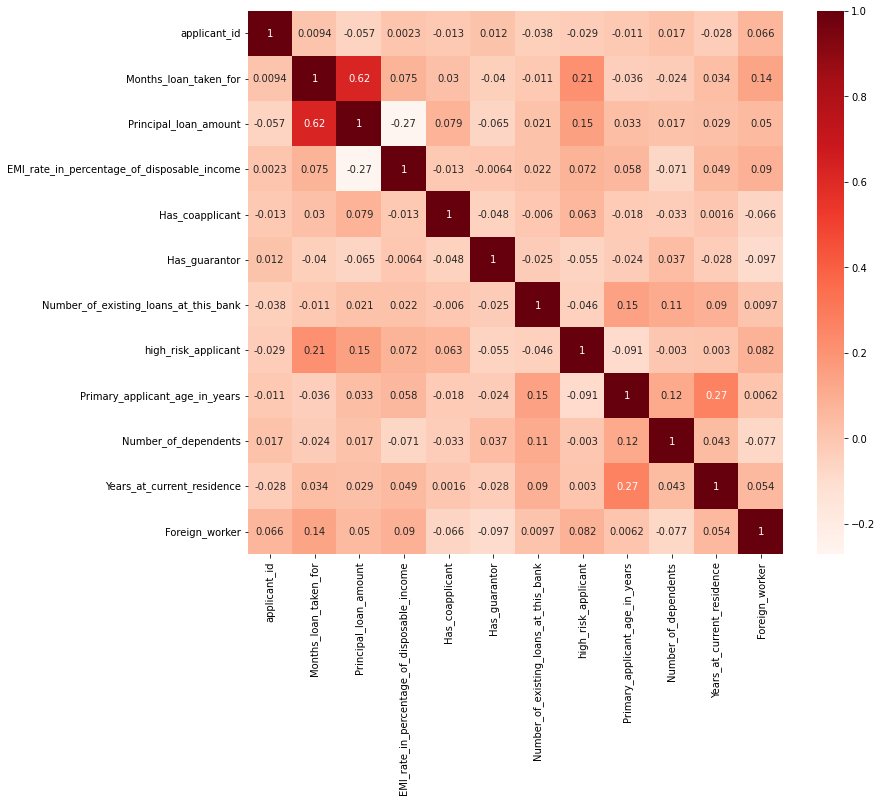

In [31]:
plt.figure(figsize=(12,10))
cor = df_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [37]:
#Correlation with output variable

cor_target = abs(cor["high_risk_applicant"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features


Months_loan_taken_for    0.214927
Principal_loan_amount    0.154739
high_risk_applicant      1.000000
Name: high_risk_applicant, dtype: float64

# Two features correlated to target column having greater than 0.2

# **Detailed distribution of Amount Taken v/s Target Column**

In [23]:
import plotly.figure_factory as ff


df_good = df_new[df_new["high_risk_applicant"] == 0]
df_bad = df_new[df_new["high_risk_applicant"] == 1]

import numpy as np
plt.figure(figsize=(10,10))

# Add histogram data
x1 = np.log(df_good['Principal_loan_amount']) 
x2 = np.log(df_bad["Principal_loan_amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

<Figure size 720x720 with 0 Axes>

# **Better View**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



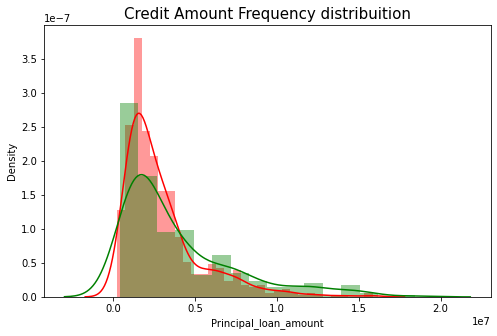

In [24]:
#Ploting the good and bad dataframes in distplot
plt.figure(figsize = (8,5))

g= sns.distplot(df_good['Principal_loan_amount'], color='r')
g = sns.distplot(df_bad["Principal_loan_amount"], color='g')
g.set_title("Credit Amount Frequency distribuition", fontsize=15)
plt.show()

# **Dividing Age column with respect to particular type and analyse**

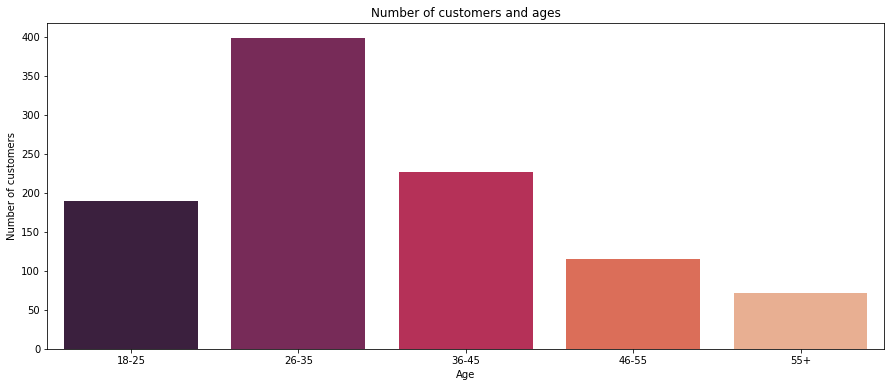

In [25]:
Age18_25=df_new.Primary_applicant_age_in_years[(df_new.Primary_applicant_age_in_years<=25) & (df_new.Primary_applicant_age_in_years>=18)]
Age26_35=df_new.Primary_applicant_age_in_years[(df_new.Primary_applicant_age_in_years<=35) & (df_new.Primary_applicant_age_in_years>=26)] 
Age36_45=df_new.Primary_applicant_age_in_years[(df_new.Primary_applicant_age_in_years<=45) & (df_new.Primary_applicant_age_in_years>=36)] 
Age46_55=df_new.Primary_applicant_age_in_years[(df_new.Primary_applicant_age_in_years<=55) & (df_new.Primary_applicant_age_in_years>=46)] 
Age55above=df_new.Primary_applicant_age_in_years[(df_new.Primary_applicant_age_in_years>=56)] 


x=['18-25','26-35','36-45','46-55','55+']
y=[len(Age18_25.values),len(Age26_35.values),len(Age36_45.values),len(Age46_55.values),len(Age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y,palette='rocket')
plt.title("Number of customers and ages")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

# Insights From graph:

persons Between 26 to 35 age were more number and only few are b/w 55+ 

# **Distribution Of age v/s target column**

In [26]:
import plotly.tools as tls
import plotly.graph_objs as go
df_good = df_new.loc[df_new["high_risk_applicant"] == 0]['Primary_applicant_age_in_years'].values.tolist()
df_bad = df_new.loc[df_new["high_risk_applicant"] == 1]['Primary_applicant_age_in_years'].values.tolist()
df_age = df_new['Primary_applicant_age_in_years'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# **Amount credited by Employment and Employment according to age v/s Target column**

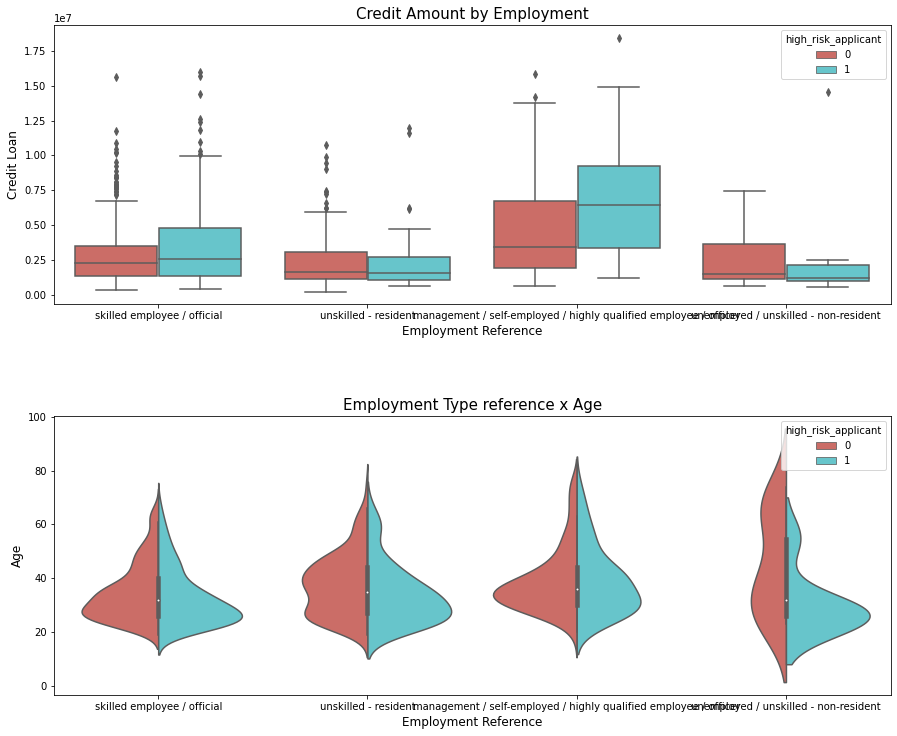

In [27]:
fig, ax = plt.subplots(figsize=(15,12), nrows=2)


g1 = sns.boxplot(x="Employment_status", y="Principal_loan_amount", data=df_new, 
            palette="hls", ax=ax[0], hue="high_risk_applicant")
g1.set_title("Credit Amount by Employment", fontsize=15)
g1.set_xlabel("Employment Reference", fontsize=12)
g1.set_ylabel("Credit Loan", fontsize=12)

g2 = sns.violinplot(x="Employment_status", y="Primary_applicant_age_in_years", data=df_new, ax=ax[1],  
               hue="high_risk_applicant", split=True, palette="hls")
g2.set_title("Employment Type reference x Age", fontsize=15)
g2.set_xlabel("Employment Reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

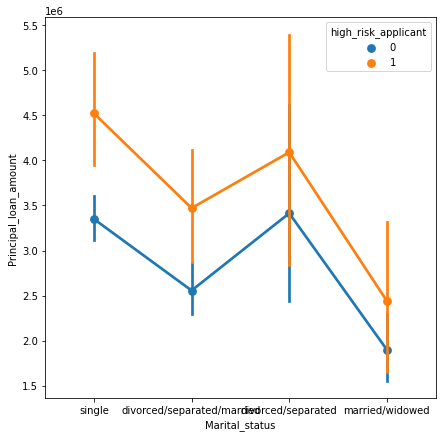

In [28]:
plt.figure(figsize=(7,7))
sns.pointplot(data=df_new,y='Principal_loan_amount',x='Marital_status',hue='high_risk_applicant')

# **Crosstab session for understanding Gender and Employment by  metrics**

In [29]:
print(pd.crosstab(df_new.Gender, df_new.Employment_status))

Employment_status  management / self-employed / highly qualified employee / officer  \
Gender                                                                                
female                                                            37                  
male                                                             111                  

Employment_status  skilled employee / official  \
Gender                                           
female                                     197   
male                                       433   

Employment_status  unemployed / unskilled - non-resident  unskilled - resident  
Gender                                                                          
female                                                12                    64  
male                                                  10                   136  


# **Questions**

# **1. How would you segment customers based on their risk (of default)?.**

  By using K means Clustering model  we should segment customers baased on their risk
 
# **2. Which of these segments / sub-segments would you propose be approved?**
   
  1. persons who Took loan for Purchase Electronic Equipment should have high chance to pay loan.
  2. persons have low savings in account have high chance to pay back loan.
  3. persons have their own house were high probability to pay back loan.
  4. persons who are not married were high probability to pay back loan.
